# Make your own MCMC sampler

### Show the position of the star in the orbital frame at time t

Using the center of mass position equation:

$$R=\frac{1}{m_{1} + m_{2}} (m_{1}r_{1} + m_{2}r_{2})$$

As the center of mass is considered as the origin (0,0,0)

$$0=\frac{1}{m_{1} + m_{2}} (m_{1}r_{1} + m_{2}r_{2})$$

Solving for $r_{1}$:

$$\boxed{r_{1}=\frac{-m_{2}r_{2}}{m_{1}}}$$



Let's remember that $r_{2}$ is the distance between the planet and th CM and $r_{1}$ is the distance between the star and the CM, a is considered as the semi-major axis. In that way, replacing the expression for $r_{2}$ we obtain:

$$r_{1}= \frac{-m_{2}}{m_{1}}(a-r_{1})$$

$$r_{1}=\frac{-m_{2}}{m_{1}}a + \frac{m_{2}}{m_{1}}r_{1}$$

Solving for $r_{1}$:


$$r_{1}=\frac{-m_{2}a}{m_{1}-m_{2}}r$$

But in polar coordiantes we know that:

$$r=\begin{pmatrix}r_{1} \cos(\omega t) \\r_{1} \sin(\omega t) \\ 0\end{pmatrix}$$

Which lead us to:

$$\boxed{r(t)=\frac{-m_{2}a}{m_{1}+m_{2}}\begin{pmatrix} \cos(\omega t) \\ \sin(\omega t) \\ 0\end{pmatrix}}$$

And $\omega$ is extracted from Kepler's third law:

$$\frac{G(M+m)}{a^{3}}=\omega^{2}$$

$$\omega= \sqrt{\frac{G(M+m)}{a^{3}}}$$

### Show the velocity of the star projected onto the z axis at time t 

$$v_{z}= v_{y'}\sin i$$

$$r_{y}(t)=\frac{-am}{M+m} \sin (n(t-t_{0}))$$


$$\dot{r_{y}}(t)=\frac{-amn}{M+m} \cos (n(t-t_{0}))$$

$$n=\sqrt{\frac{G(M+m)}{a^{3}}}$$

$$a=\frac{(G(M+m))^{1/3}}{n^{2/3}}$$

Replacing those terms we obtain:

$$\boxed{\dot{r_{y}}(t)=\frac{(Gn)^{1/3}}{(M+m)^{2/3}} m\sin i \cos (n(t-t_{0})) + V_{0}}$$

### Give the expression of the likelihood (or loglikelihood) function

$$\log \mathscr{L}= \frac{-1}{2}\begin{bmatrix}\frac{(\sum y-mod )^{2}}{\sigma^{2}} + \log(2\pi \sigma^{2})\end{bmatrix}$$

### Give the relations between the parameters A, B, C 

$$v(t)=A\cos(nt) + B\sin(nt) +C$$

Let set $k=\frac{(Gn)^{1/3}m}{(M+m)^{2/3}}$

$$v(t)= v_{0} + k\sin i \cos (n(t-t_{0})$$

Expanding that expression we obtain:

$$v(t)= v_{0} + k\sin i \begin{bmatrix}\cos(nt)\cos(nt_{0}) - \sin(nt)\sin(nt_{0})\end{bmatrix}$$

Which lead us set:

$$C=v_{0}$$

$$A=\frac{(Gn)^{1/3}}{(M+m)^{2/3}}m\sin i \cos(nt_{0})$$

$$B=\frac{(Gn)^{1/3}}{(M+m)^{2/3}}m\sin i \sin(nt_{0})$$


### Give the expression of the maximum likelihood estimate of theta

$$\theta_{MLE}= argmax(\mathscr{L}(\theta))$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import corner

In [2]:
data = np.genfromtxt("rv_data.txt")
time=data[:,0]
measure=data[:,1]
msr_err=data[:,2]

### Compute the maximum likelihood values of the parameters

$$\log \mathscr{L}= \frac{-1}{2}\begin{bmatrix}\frac{(\sum y-mod )^{2}}{\sigma^{2}} + \log(2\pi \sigma^{2})\end {bmatrix}$$

$$mod= A\cos(nt) + B\sin(nt) + C$$

$$\log \mathscr{L}= \frac{-1}{2} \begin{bmatrix}\frac{(\sum y-(A\cos(nt) + B\sin(nt) + C) )^{2}}{\sigma^{2}} + \log(2\pi \sigma^{2})\end {bmatrix}$$


We compute the derivative and put all the three equations equals to zero to find the maximum value:

$$\frac{\partial \log \mathscr{L} }{\partial A}=0$$

$$\frac{\partial \log \mathscr{L} }{\partial B}=0$$

$$\frac{\partial \log \mathscr{L} }{\partial C}=0$$

Which lead us to:

$$\frac{\sum y \cos(nt)}{\sigma^{2}} = \frac{(A\cos(nt) + B\sin(nt) + C)\cos(nt)}{\sigma^{2}}$$

$$\frac{\sum y \sin(nt)}{\sigma^{2}} = \frac{(A\cos(nt) + B\sin(nt) + C)\sin(nt)}{\sigma^{2}}$$

$$\frac{\sum y}{\sigma^{2}} = \frac{(A\cos(nt) + B\sin(nt) + C)}{\sigma^{2}}$$

Putting in a matricial form we obtain:

$$\sum \frac{1}{\sigma^{2}}\begin{pmatrix}
\cos^{2} (nt) & \sin(nt)\cos(nt) & \cos(nt)\\
\cos(nt)\sin(nt) & \sin^{2}(nt) & \sin(nt)\\
\cos(nt) & \sin(nt) & 1
\end{pmatrix} \begin{pmatrix} A \\B \\ C\end{pmatrix}= \sum \frac{1}{\sigma^{2}} \begin{pmatrix} \frac{y}{\cos(nt)} \\\frac{y}{\sin(nt)} \\ y\end{pmatrix}$$

In [3]:
n=2*np.pi/6.5
nt=n*time
cos2=np.cos(nt)**2
sin2=np.sin(nt)**2
ms2=msr_err**2

x1=np.sum(cos2/ms2)
x2=np.sum(np.sin(nt)*np.cos(nt)/ms2)
x3=np.sum(np.cos(nt)/ms2)
x4=np.sum(np.cos(n*time)*np.sin(nt)/ms2)
x5=np.sum(sin2/ms2)
x6=np.sum(np.sin(nt)/ms2)
x7=np.sum(np.cos(nt)/ms2)
x8=np.sum(np.sin(nt)/ms2)
x9=np.sum(np.ones(len(time))/ms2)

m = np.array([[x1,x2,x3],[x4,x5,x6],[x7,x8,x9]])

In [4]:
y1=np.sum(measure/(msr_err**2)*np.cos(nt))
y2=np.sum(measure/(msr_err**2)*np.sin(nt))
y3=np.sum(measure/(msr_err**2))
b=np.array([y1,y2,y3])[:,np.newaxis]

In [5]:
m

array([[ 49.54005706,   6.03388699,  14.98648463],
       [  6.03388699,  26.56020815, -14.82646429],
       [ 14.98648463, -14.82646429,  76.1002652 ]])

In [6]:
b

array([[105.07953984],
       [ 17.9473186 ],
       [ 24.93131372]])

In [7]:
coeff=np.linalg.solve(m,b)
coeff

array([[ 2.1189736 ],
       [ 0.16188337],
       [-0.05814032]])

In [8]:
def gaussian(x,sigma):
    sq=np.sqrt(2*np.pi)
    den=sq*sigma
    cte=1/den

    gauss=cte* np.exp((-0.5*pow(x,2)/pow(sigma,2)))    
    return gauss


###  Express the criterion of Eq. (7) as a function of the prior probabilities 

$$\alpha=min \left(1,\frac{f(\theta') q_{\theta'}(\theta_{i})}{f(\theta_{i})q_{\theta_{i}}(\theta')}\right)$$
 

$$\alpha=min \left(1,\frac{p(y|\theta') p(\theta')}{p(y|\theta_{i})p(\theta)}\right)$$

$$\log \alpha=min (0,\log(\mathscr{L}(\theta')) - \log(\mathscr{L}(\theta)) + \log(p(\theta'))- \log(p(\theta)))$$



In [9]:
def log_prior(A,B,C,sigma):
        prior=gaussian(A,sigma)*gaussian(B,sigma)*gaussian(C,sigma)
        return prior

In [10]:
def model(A,B,C,n,t):
    mod=A*np.cos(n*t) + B*np.sin(n*t) + C
    return mod    

In [11]:
def log_likelihood(A,B,C,n,t):
   
    lkhd_mod=-np.sum(np.log(np.sqrt(2*np.pi*msr_err**2))) -np.sum((measure-model(A,B,C,n,t))**2 / (2*msr_err**2))

    return lkhd_mod



In [12]:
tobs=time[-1]-time[0]
sigma_n_frac=(0.1*(2*np.pi)/tobs)
sigma_new=(0.06,0.06,0.06,sigma_n_frac)
print(sigma_n_frac)



def gen_proposal(theta):
    new_theta=[]
    for i in range(len(theta_old)):
        prop= np.random.normal(theta[i], sigma_new[i])
        new_theta.append(prop)
        
    return new_theta

0.008149228170595145


In [13]:
n0=(2*np.pi)/6.5
A0=coeff[0]
B0=coeff[1]
C0=coeff[2]
theta_old=[A0.item(),B0.item(),C0.item(),n0]

n_iter=1000000
accepted  = 0
accept = [theta_old]

for i in range(n_iter):
    
        theta = accept[-1]
        proposal=gen_proposal(theta)
        
        f_thetai=log_likelihood(theta[0],theta[1],theta[2],theta[3],time) #likelihood old data
        q_thetai=log_prior(theta[0],theta[1],theta[2],100) #logprior old data
        
        f_thetaprim=log_likelihood(proposal[0],proposal[1],proposal[2],proposal[3],time)#likelihood new data
        q_thetap=log_prior(proposal[0],proposal[1],proposal[2],100) #logprior new data
        
    

        log_alpha=np.min([0, f_thetaprim + q_thetap -f_thetai-q_thetai])
        
        
        alpha=np.exp(log_alpha)
        u=np.random.uniform(0,1)
        
       
        
        if (u < alpha):
            accept.append(proposal)
            accepted = accepted + 1.0
        else:
            accept.append(theta)
            
        
rate=(accepted/n_iter)*100
print ("Acceptance rate = "+str(rate))

    

Acceptance rate = 22.408900000000003


In [14]:
As=([i[0] for i in accept])[250000:]
Bs=([i[1] for i in accept])[250000:]
Cs=([i[2] for i in accept])[250000:]
ns=([i[3] for i in accept])[250000:]

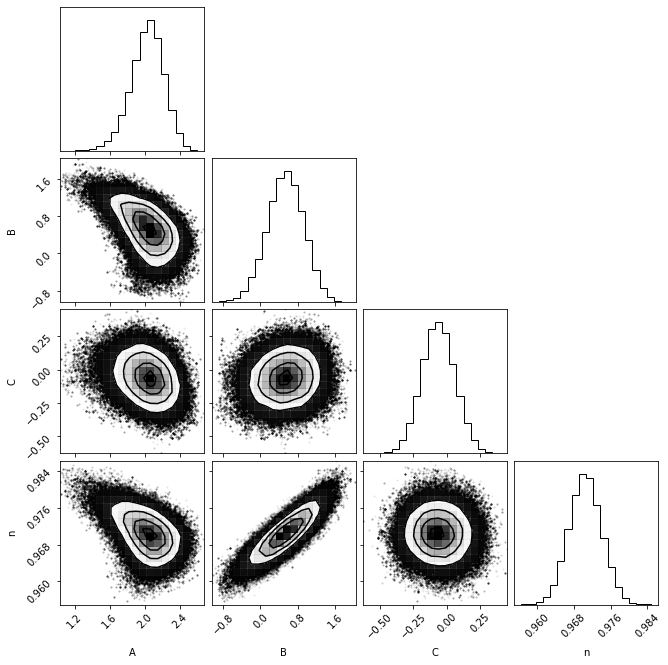

In [15]:
# samples = np.array((np.vstack([As,Bs,Cs,ns])).T)
# corner.corner(samples)
data =  np.transpose(np.vstack([As, Bs, Cs, ns]))
fig = corner.corner(data, labels=['A', 'B', 'C', 'n'])

In [16]:
meanAs=np.mean(As)
meanBs=np.mean(Bs)
meanCs=np.mean(Cs)
meanNs=np.mean(ns)
print("Mean of As" +" "+ str(meanAs))
print("Mean of Bs" +" "+ str(meanBs))
print("Mean of Cs" +" "+ str(meanCs))
print("Mean of ns" +" "+ str(meanNs))

Mean of As 2.0224198962252653
Mean of Bs 0.5310814156961453
Mean of Cs -0.0629916690212213
Mean of ns 0.9704628639667313


In [17]:
medianAs=np.median(As)
medianBs=np.median(Bs)
medianCs=np.median(Cs)
medianNs=np.median(ns)
print("Median of As" +" "+ str(medianAs))
print("Median of Bs" +" "+ str(medianBs))
print("Median of Cs" +" "+ str(medianCs))
print("Median of ns" +" "+ str(medianNs))

Median of As 2.035644569681773
Median of Bs 0.5392137930937694
Median of Cs -0.06370670337205037
Median of ns 0.9704491716171296


### Compute the corresponding minimum mass of the planet 

From previous points we know that:


$$A=\frac{(Gn)^{1/3}}{(M+m)^{2/3}}m\sin i \cos(nt_{0})$$

$$B=\frac{(Gn)^{1/3}}{(M+m)^{2/3}}m\sin i \sin(nt_{0})$$

Making $A^{2} + B^{2}$ we obtain:

$$A^{2} + B^{2}= \frac{(Gn)^{2/3}}{M^{4/3}} (m\sin i)^{2} [\cos^{2}(nt_{0}) + \sin^{2}(nt_{0})]$$

$$\boxed{m\sin i= min (\sqrt{(A^{2} + B^{2}) \frac{M^{4/3}}{(Gn)^{2/3}}})}$$

6.162034850198987

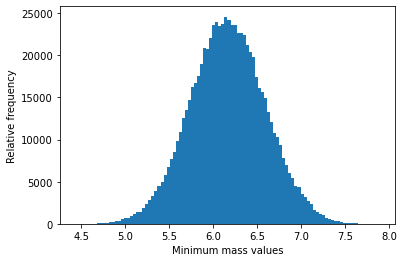

In [18]:
G=6.6*10**-11
nsa=np.array(ns)
Bs2=np.array(Bs)
As2=np.array(As)
Ms=1.92*10**30
Me=5.9*10**24


num=(pow(As2,2)+pow(Bs2,2))*(pow(Ms,4.0/3.0))
Gn=G*nsa/86400
den=pow(Gn,2.0/3.0)
total=np.sqrt(num/den)
total1=total/Me
minimum=np.min(total1)
median=np.median(total1)
plt.hist(total1,bins=100)
plt.xlabel("Minimum mass values")
plt.ylabel("Relative frequency")
median

In [19]:
alpha = 0.95
p1 = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(total1, p1)
p2 = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(total1, p2)
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")
diff=-lower+upper
print("Difference between lower and upper"+ " " +str(diff))


95.0 confidence interval 5.330681220516508 and 7.0045395685614915
Difference between lower and upper 1.6738583480449831


In [20]:
vrbl=1.9660*np.std(total1)
mn=np.mean(total1)
low2=mn-vrbl
up2=mn+vrbl
rate2=0

for i in range(len(total1)):
    if total1[i]>=low2 and total1[i]<= up2 :
        rate2=rate2+1

percen=(rate2/len(total1))*100

print(f"\n Symetrical interval {low2} and {up2}")
diff2=-low2+up2
print("Difference between lower and upper"+ " " +str(diff2))


 Symetrical interval 5.327370141521683 and 7.001225499592456
Difference between lower and upper 1.6738553580707727
